## Permutations and Combinations

`set = {a, b, c}` 

- **Permutations** are the number of orders the elements can have. 
    - For the set above, `abc`, `acb`, `bca`, `bac`, `cba`, `cab` exists 
    - 3! 3 Factirial permutations exist
- **Combinations** are a selection of elements from a set
    - `math.comb(n, k)` calculates the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.
    - For the set above, the combinations `{a, b}, {a, c}, {b, c}` exist
    - The formula for combinations is 

$$
\frac{n!}{k!\times(n-k)!}
$$

## Lady Tasting Tea

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

In [10]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [3]:
cups = 8
milk_first = 4

math.comb(cups, milk_first)

70

#### Combinations using `math.comb`

Return the number of ways to choose 4 cups from 8, without being able to choose the same cup twice, order does not matter.
- 70 ways to choose 4 cups from 8, so a 1 in 70 chance she'll randomly choose 4 correct? 

In [ ]:
# Total number of ways to select 4 cups from 8, order does matter:
8*7*6*5 

1680

Cups: `1 2 3 4 5 6 7 8`

Placeholders: `_ _ _ _`

- In this scenario, cups `2`, `4`, `5`, `8`,  is not the same as cups `8`, `4`, `5`, `2`, is not the same as `2`, `5`, `8`, `4` and so on... 
- This scenario ends up being `8*7*6*5`  because when I put a cup in place 1, I have 7 options for place 2. When I put a cup in place 2, I have 6 options for place 3, when I put a cup in place 3, I have  5 options for place 4. 
- But we do not care about the order, so we would take the results of `8*7*6*5` and divide that by the amount of orders the 4 cups can have, which is `4*3*2*1`.
- `8*7*6*5` is actually $8! \div (8-4)!$
- `4*3*2*1` is $4!$
- So, this becomes: 

$$
\frac{n!}{k!\times(n-k)!}
$$



In [6]:
# No of ways of shuffling 4 cups:
4*3*2*1

24

In [8]:
1680//24

70

## Lady Tasting Tea Experiment

In [17]:
# The labels on the cups:
labels = list(range(8))
# The 70 combinations of 4 that exist
combs = list(itertools.combinations(labels, 4))
# The actual combination that contain the milk first 
milk_cups = random.sample(labels, 4)
milk_cups

[7, 6, 1, 0]

In [20]:
#Print the intersection between the list of 70 combinations 
# and the actual set with milk first 
milk_cups_set = set(milk_cups)
number_overlaps = []

for comb in combs:
    # for each combination in the list - first make it into a set so that the .intersections() function works
    comb_set = set(comb)
    overlap = comb_set.intersection(milk_cups_set)
    number_overlaps.append(len(overlap))
    print(comb_set, len(overlap), overlap)

{0, 1, 2, 3} 2 {0, 1}
{0, 1, 2, 4} 2 {0, 1}
{0, 1, 2, 5} 2 {0, 1}
{0, 1, 2, 6} 3 {0, 1, 6}
{0, 1, 2, 7} 3 {0, 1, 7}
{0, 1, 3, 4} 2 {0, 1}
{0, 1, 3, 5} 2 {0, 1}
{0, 1, 3, 6} 3 {0, 1, 6}
{0, 1, 3, 7} 3 {0, 1, 7}
{0, 1, 4, 5} 2 {0, 1}
{0, 1, 4, 6} 3 {0, 1, 6}
{0, 1, 4, 7} 3 {0, 1, 7}
{0, 1, 5, 6} 3 {0, 1, 6}
{0, 1, 5, 7} 3 {0, 1, 7}
{0, 1, 6, 7} 4 {0, 1, 6, 7}
{0, 2, 3, 4} 1 {0}
{0, 2, 3, 5} 1 {0}
{0, 2, 3, 6} 2 {0, 6}
{0, 2, 3, 7} 2 {0, 7}
{0, 2, 4, 5} 1 {0}
{0, 2, 4, 6} 2 {0, 6}
{0, 2, 4, 7} 2 {0, 7}
{0, 2, 5, 6} 2 {0, 6}
{0, 2, 5, 7} 2 {0, 7}
{0, 2, 6, 7} 3 {0, 6, 7}
{0, 3, 4, 5} 1 {0}
{0, 3, 4, 6} 2 {0, 6}
{0, 3, 4, 7} 2 {0, 7}
{0, 3, 5, 6} 2 {0, 6}
{0, 3, 5, 7} 2 {0, 7}
{0, 3, 6, 7} 3 {0, 6, 7}
{0, 4, 5, 6} 2 {0, 6}
{0, 4, 5, 7} 2 {0, 7}
{0, 4, 6, 7} 3 {0, 6, 7}
{0, 5, 6, 7} 3 {0, 6, 7}
{1, 2, 3, 4} 1 {1}
{1, 2, 3, 5} 1 {1}
{1, 2, 3, 6} 2 {1, 6}
{1, 2, 3, 7} 2 {1, 7}
{1, 2, 4, 5} 1 {1}
{1, 2, 4, 6} 2 {1, 6}
{1, 2, 4, 7} 2 {1, 7}
{1, 2, 5, 6} 2 {1, 6}
{1, 2, 5, 7} 2 {1, 7}
{1, 2, 6, 7

In [24]:
# Now find out in how many of the 70 combinations do the 4 milk cups overlap (obviously only once)
# In how many of the 70 combinations do the 4 milk cups not show up (also obviously only once)
# How many overlap 1 cup, 2 cups, 3 cups though?

counts = np.unique(number_overlaps, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

<BarContainer object of 5 artists>

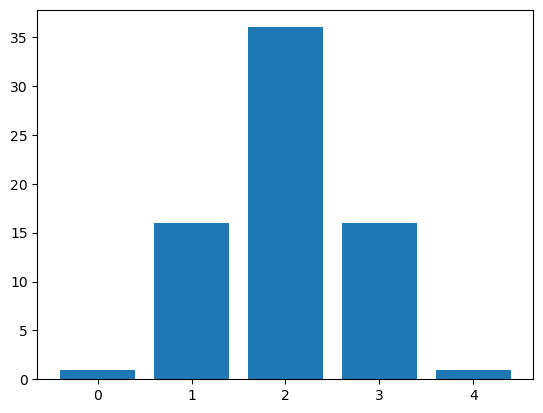

In [25]:
plt.bar(counts[0], counts[1])

In [27]:
#From the above overlaps in the list of 70 possible combinations
p_zero_cups = 1/70
p_one_cup = 16/70
p_two_cups = 36/70 #A little over half that she will pick two correct cups - why? 
p_three_cups = 16/70
p_all_cups = 1/70

p_at_least_three_cups = (1+16)/70
p__at_least_two_cups = (36+16+1)/70
p_at_least_one_cup = (16+36+16+1)/70

# Hypothesis Testing 

### $H0$ Null Hypothesis: 
- She cannot tell the difference - she is choosing the cups at random 

### $Ha$ Alternative Hypothesis
- She is choosing the cups not at random

## Normal Distribution
****************

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Using np.random.binomial() to simulate flipping 2 coins 1000 times
twoflips = np.random.binomial(2, 0.5, 1000) # Perform 2 trials, each with a 0.5 chance of success, do that 1000 times
#Results
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True) #Results can be 0 success, 1 success, or 2 success. 1000 times. 
uniques, counts


(array([0, 1, 2], dtype=int32), array([266, 489, 245]))

Text(0, 0.5, 'Count')

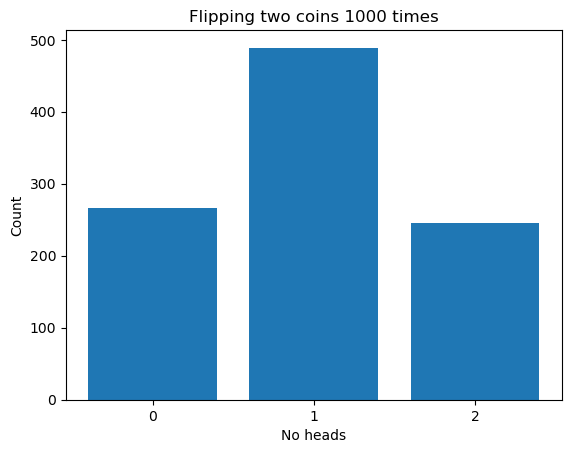

In [ ]:
# Create a blank plot.
fig, ax = plt.subplots()
ax.bar(uniques, counts)
ax.set_xticks(uniques)
ax.set_title('Flipping two coins 1000 times')
ax.set_xlabel('No. heads')
ax.set_ylabel('Count')

- In the above plot, when counting 1 success, we count 1 head 1 tail, and 1 tail 1 head
- We can simulate an experimet where we are keeping track of which turns up heads, and which turns up tails.

### Filpping Two Coin - Track Individual Outcomes

In [ ]:
twoflipsind = np.random.binomial(1,0.5, (1000, 2)) #1 trial, 0.5 p success, 1000 times, twice 
uniques, counts = np.unique(twoflipsind, return_counts=True, axis=0)
uniques,counts

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]], dtype=int32),
 array([228, 260, 263, 249]))

### Flipping More Coins


In [2]:
nflips = np.random.binomial(100, 0.5, 100000)
uniques, counts = np.unique(nflips, return_counts=True)
uniques,counts #The first array will give how many success occurred in the 100 coin flips, the second array will give how many times that number of successes occurred in the 10000 times you flipped 100 coins

(array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
        63, 64, 65, 66, 67, 68, 69, 70, 71, 74], dtype=int32),
 array([   2,    2,    4,    9,   24,   46,   93,  141,  261,  448,  721,
        1058, 1614, 2244, 2999, 3948, 4705, 5750, 6894, 7364, 7747, 8074,
        7747, 7297, 6637, 5747, 4844, 3827, 3105, 2186, 1536, 1095,  746,
         487,  270,  137,   99,   47,   25,    7,    7,    3,    2,    1]))

Text(0, 0.5, 'Count')

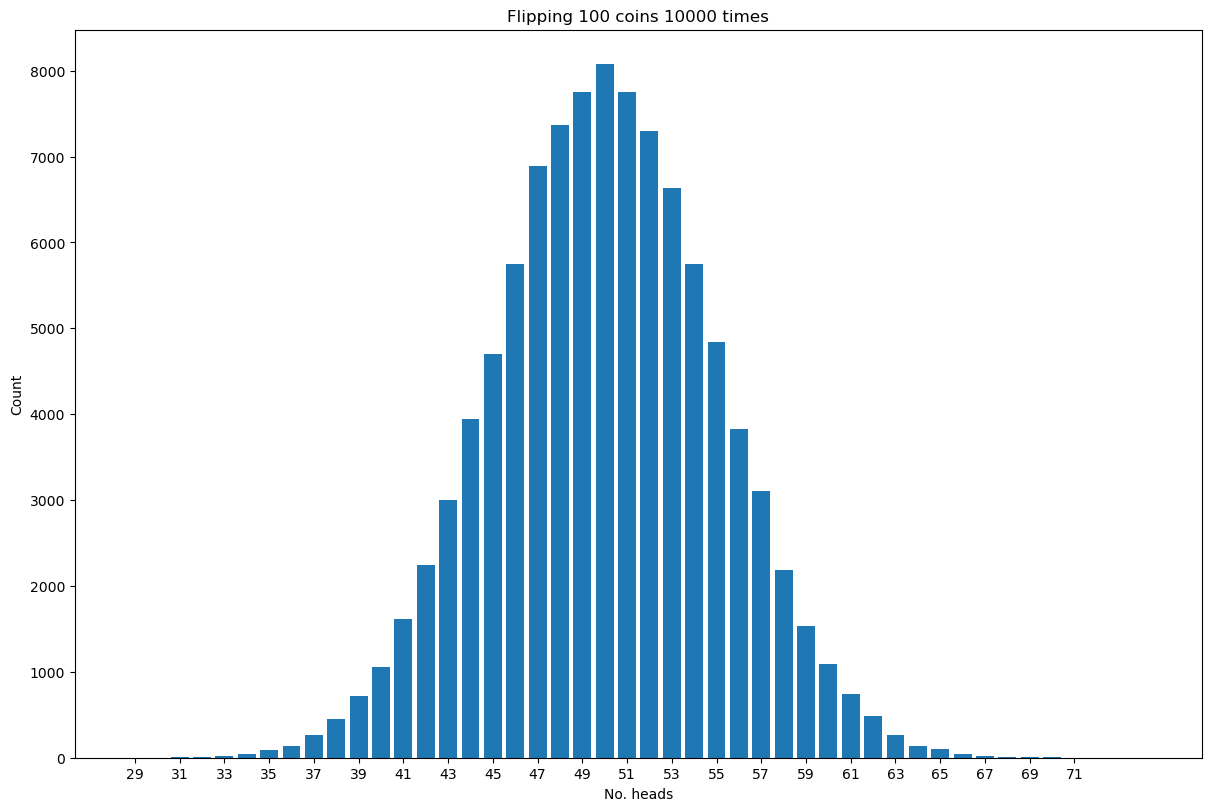

In [3]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,8), constrained_layout=True)
ax.bar(uniques, counts)
ax.set_xticks(uniques[::2])
ax.set_title('Flipping 100 coins 10000 times')
ax.set_xlabel('No. heads')
ax.set_ylabel('Count')

### Probability Density Function

####  **Normal Distribution** or a **Gaussian Distribution** 

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

- The above describes a **Normal Distribution** or a **Gaussian Distribution**.
- $\mu$ = mean
- $\sigma$ = standard deviation
- $\sigma^2$ = variance 


#### **Understanding the Probability Density Function**
- This element of the function, $\frac{1}{\sqrt{2\pi\sigma^2}}e$, just  is a constant that ensures that the area beneath the curve is always 1 (because the probability of everything everywhere all at once = 1)
- This element of the function, $(x-\mu)^2$, describes where the functions should be centred, if $\mu$ is 0, the bell curve is centred over 0.


### Plot of the Standard Normal Distribution
- The standard normal distribution is:
    - $\mu$ = mean = 0 
    - $\sigma$ = standard deviation = 1
    - $\sigma^2$ = variance = 1 

In [8]:
#Define a function that calculates the probability density function
def pdf(x, mu, sigma): #the pdf has 3 variables, all else in constant
    constant = 1.0/(np.sqrt(2 * np.pi * sigma**2))
    deviation = ((x - mu)**2 / (2.0 * sigma**2))
    y=constant*np.exp(-(deviation))
    return y

Text(0, 0.5, 'f(x)')

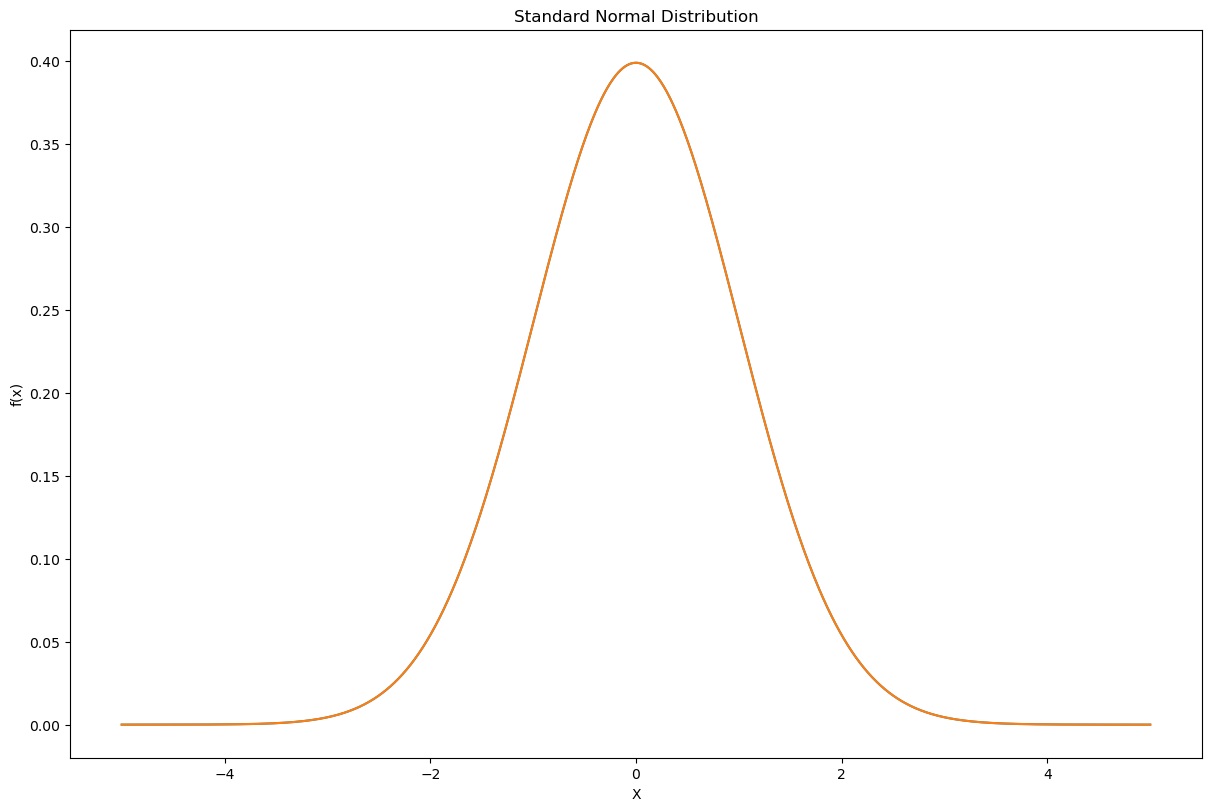

In [10]:
x = np.linspace(-5.0,5.0,1001) #create a range of x values to run the pdf function on
mu=0.0
sigma=1.0
y = pdf(x, mu, sigma)
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,8), constrained_layout=True)
ax.plot(x, y1)
ax.plot(x, y)
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('X')
ax.set_ylabel('f(x)')

(np.float64(50.0), np.float64(12.409673645990857))

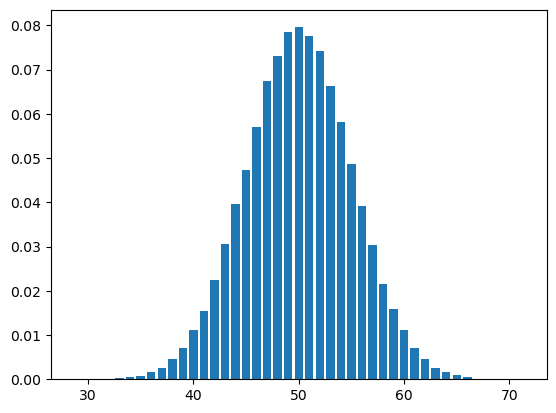

In [23]:
# flip 100 coins - do this 100,000 times
nflips = np.random.binomial(100, 0.5, 100000)
uniques, counts = np.unique(nflips, return_counts=True)
plt.bar(uniques, counts/100000)

np.mean(uniques), np.std(uniques)

Text(0, 0.5, 'Count')

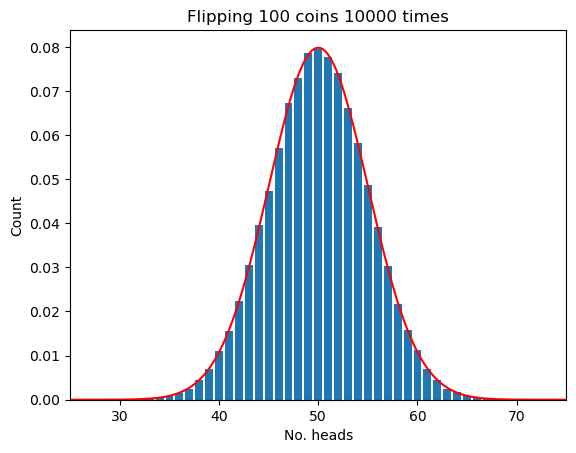

In [30]:
x = np.linspace(0,100,10001) #create a range of x values to run the pdf function on
mu=np.mean(uniques)
sigma=np.std(uniques)
y = pdf(x, mu, 5)
# Create a blank plot.
fig, ax = plt.subplots()
ax.bar(uniques, counts/100000)
ax.plot(x, y, "r")
ax.set_xlim(25,75)
ax.set_title('Flipping 100 coins 10000 times')
ax.set_xlabel('No. heads')
ax.set_ylabel('Count')


## Normal Distribution
#### Week 6: Generating a Normal Distribution with Numpy
****************
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [31]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
data = np.random.normal(loc=10, scale=1, size=6) #Draw random samples from a normal distribution - loc=the mean, scale=the standard deviation
data

array([10.34636576,  9.36485922, 10.5581794 ,  9.47212477,  9.13427137,
       10.19549308])

[[-0.70454145 -0.55070921]
 [ 0.57618239  0.56656716]
 [ 1.61980305 -1.19434534]
 [-0.79752223  0.20518003]
 [-0.93362981 -0.02260209]
 [ 1.67387109  0.46631062]
 [ 0.83418883 -1.30005285]
 [ 2.26706409 -1.06200407]
 [ 1.05724945 -0.5328684 ]
 [ 0.36039394 -0.59388379]
 [-0.71763075  0.67435559]
 [ 0.42975098 -0.50751323]]


<BarContainer object of 24 artists>

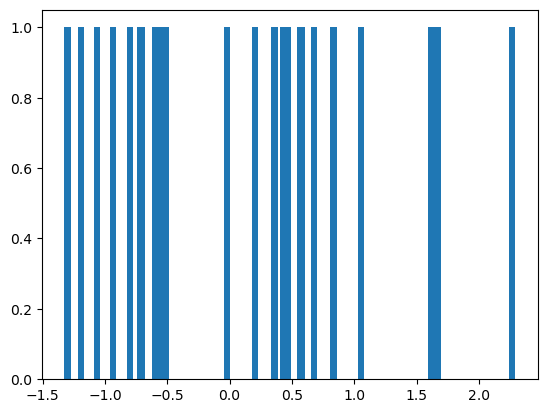

In [65]:
rng = np.random.default_rng()
data = rng.normal(loc=0.0, scale=1.0, size=(12,2))
uniques, counts = np.unique(data, return_counts=True)
print(data)
plt.bar(uniques, counts, width=0.05)

In [66]:
rng = np.random.default_rng()
data = rng.normal(loc=0.0, scale=1.0, size=(10000))
uniques, counts = np.unique(data, return_counts=True)

(array([0.000e+00, 8.000e-04, 3.600e-03, 2.800e-03, 7.600e-03, 1.080e-02,
        2.400e-02, 4.160e-02, 7.080e-02, 1.108e-01, 1.552e-01, 2.144e-01,
        2.680e-01, 3.316e-01, 3.736e-01, 4.100e-01, 3.896e-01, 3.424e-01,
        3.192e-01, 2.912e-01, 2.148e-01, 1.464e-01, 1.136e-01, 6.920e-02,
        4.680e-02, 2.160e-02, 9.600e-03, 5.200e-03, 2.800e-03, 8.000e-04,
        8.000e-04, 4.000e-04]),
 array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ]),
 <BarContainer object of 32 artists>)

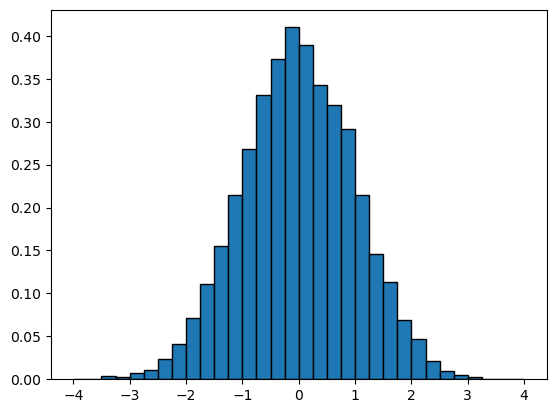

In [67]:
fig, ax = plt.subplots()
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(-4.0, 4.0, 33))

In [81]:
data = rng.normal(loc=0.0, scale=1.0, size=(3,5)) #returns an array of 3 rows, with 5 numbers in each, the 5 numbers have the normal distribution specified
data

array([[-1.70286632,  0.74370061,  0.91808147,  0.6485007 , -1.05208685],
       [-0.29659511, -0.72142409,  0.28753949,  1.24771149, -0.84112711],
       [ 1.9887141 ,  0.53465364,  0.95854727, -1.12450448,  1.14680026]])

In [82]:
np.mean(data) #should return the mean of the collapsed array, i.e., the mean of all the numbers in the array

np.float64(0.182376336730847)

In [84]:
np.mean(data, axis=1)# should return 3 means, the  across rows

array([-0.08893408, -0.06477907,  0.70084216])

#### Distribution of the means 
**************

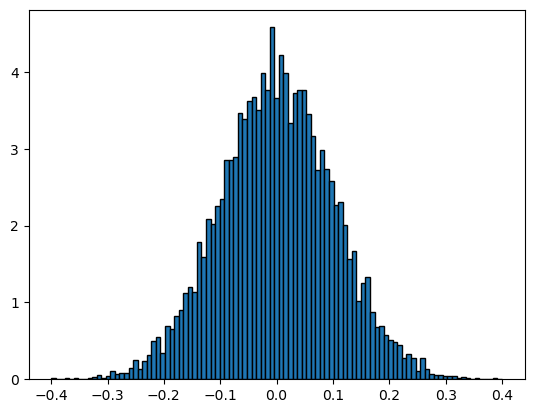

In [ ]:
data = rng.normal(loc=0.0, scale=1.0, size=(10000,100)) #returns an array of 10000 rows, with 100 numbers in each, the 5 numbers have the normal distribution specified
means=np.mean(data, axis=1)#should return 10000 means, the means of each of the std normal distribution of 100 numbers that we had
plt.hist(means, edgecolor="black", density="True", bins=np.linspace(-0.4,0.4,100));

#### Increasing the sample size

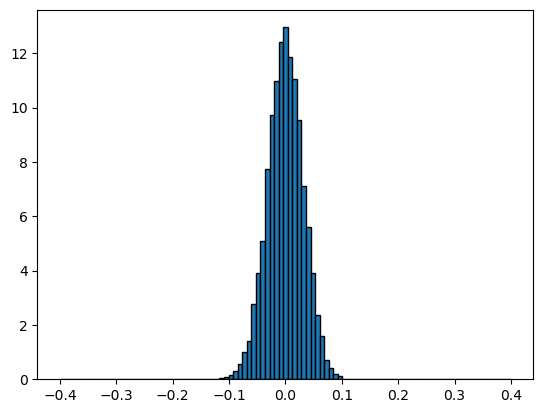

In [91]:
data = rng.normal(loc=0.0, scale=1.0, size=(10000,1000)) #returns an array of 10000 rows, with 100 numbers in each, the 5 numbers have the normal distribution specified
means=np.mean(data, axis=1)#should return 10000 means, the means of each of the std normal distribution of 100 numbers that we had
plt.hist(means, edgecolor="black", density="True", bins=np.linspace(-0.4,0.4,100));

- The standard error did not change, that is something we have fixed already when we defined "scale = 1"
- However, as you can see from the histogram above, plotting the means changed?? 
- This is the standdard deviation!
- The standard deviation is the "standard error of the mean" 
- It is $\frac{\sigma}{\sqrt{n}}$ 

## qqplot
************
Quantile Quantile Plot
- scipy stats hase a function called probplot, that calculates the quantiles for a probability plot. 
- It generates a probability plot of sample data against the quantiles of a specified distribution (defaults to a noram distribution). 
- stats models is another package that does this! 

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
rng = np.random.default_rng()
data = rng.normal(size=50000)

((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([-3.82279232, -3.80159937, -3.77793541, ...,  3.88585705,
          3.93558958,  3.94640303])),
 (np.float64(0.9998787502734275),
  np.float64(-0.002623353572847127),
  np.float64(0.9999823302678638)))

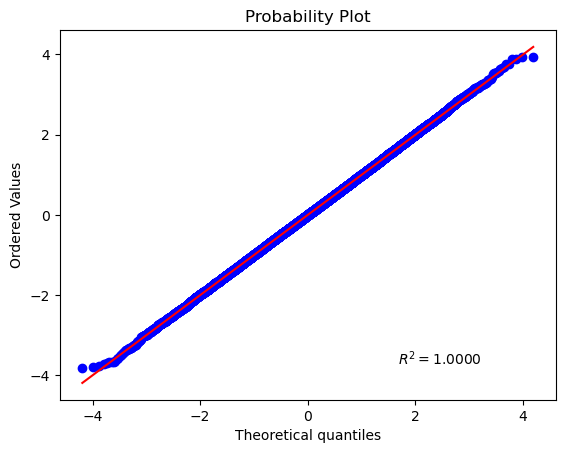

In [15]:
fig, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax, rvalue=True) #compares the points to the standard normal distribution


####  Explanations
- X-axis is a range of a theoretical standard normal distribution, (mean of 0, standard deviation of 1)
- Y-axis is the actual values of the data you have passed, plotted against where that value would theoretically fall on the theoretical distribution that you have passed.  
    - e.g. Take a value 0.015 in your actual data and point to that on the Y-axis.... 
    - On the x-axis, go out as far as you would expect that value to show up in a standard normal distribution  
    - In the normal distribution, where in the quantiles distribution should this show up - plot against this on the X-axis.   